In [333]:
import numpy as np
import pandas as pd
import seaborn as sns

In [334]:
## Load Data
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

## Data Discriptions
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [335]:
train.head()
train.columns
train.shape

(891, 12)

### PassengerId

In [313]:
train["PassengerId"].head()
train["PassengerId"].shape

train.drop(["PassengerId"],axis=1,inplace=True)
test.drop(["PassengerId"],axis=1,inplace=True)

### Pclass

In [336]:
train["Pclass"].head()    
train["Pclass"].dtype           ## int & var-type= ordinal category
train["Pclass"].isna().sum()    # No null value
train["Pclass"].isna().sum()    # No null value

train["Pclass"].value_counts()  # 1:216; 2:184; 3:491
test["Pclass"].value_counts()  # 1:107; 2:93; 3:218

3    218
1    107
2     93
Name: Pclass, dtype: int64

Probably independent(H1)


(-0.3235331843940954, 3.932785644652632e-24)

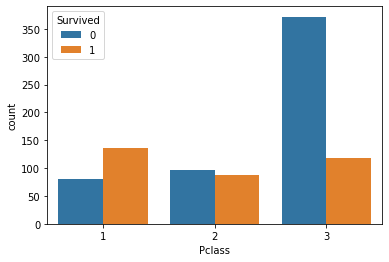

In [337]:
## visualization
sns.countplot(x=train["Pclass"],hue=train["Survived"],data=train)

pd.crosstab(train["Survived"],train["Pclass"])

# Survival Rates with in each class: class1=.63; class2=.47; class3=.24
# Survival Rates from total survived(342): class1=.39; class2=.25; class3=.34

## Correlation: As both features are ordinal
import scipy

cor,p_value=scipy.stats.kendalltau(train["Pclass"],train["Survived"])  # cor: Kendall's tau   & p_val: p-value
if p_value > 0.05:
    print('Probably independent(H0)')
else:
    print('Probably independent(H1)')
cor,p_value


In [338]:
# Summary
# Shows class-3 people tends to less survival chances
# Shows class-1 people tends to more survival chances

### Name

In [339]:
train.drop(["Name"],axis=1,inplace=True)
test.drop(["Name"],axis=1,inplace=True)

In [340]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Sex:

In [341]:
train["Sex"].shape            # total record 891
train["Sex"].isna().sum()     # No null values
test["Sex"].isna().sum()     # No null values

train["Sex"].value_counts()  # male:577; female:314
test["Sex"].value_counts()  # male:266; female:152

pd.crosstab(train["Survived"],train["Sex"])
# Survival ratio from all survived(342): Female=.68; Male=32 

# Ordinal Encoding : Male=0 ; Female=1
def sex_encoder(data):
    mapper={"male":0,"female":1}  
    data["Sex"]=data["Sex"].replace(mapper) 
    return data

sex_encoder(train)
sex_encoder(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

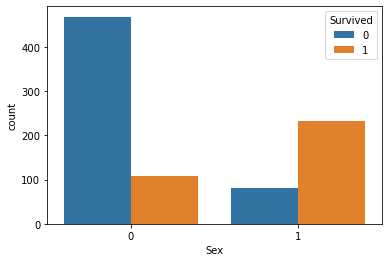

In [343]:
## visualization
sns.countplot(x=train["Sex"],hue=train["Survived"],data=train)

In [344]:
##   Summary
# Females are more likely to survive from this disaster

### Age

In [345]:
train["Age"].isna().sum()    # 177 Null values
test["Age"].isna().sum()    # 86 Null values
train["Age"].describe()      

## Rounding Age values 
train["Age"]=round(train["Age"])+1
test["Age"]=round(test["Age"])+1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train["Age"]=imputer.fit_transform(train[["Age"]])
test["Age"]=imputer.fit_transform(test[["Age"]])

## Changing type
train['Age']=train['Age'].astype(int)
test['Age']=test['Age'].astype(int)


<AxesSubplot:xlabel='Age', ylabel='Density'>

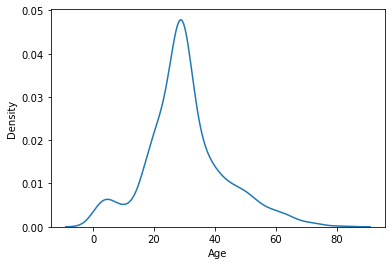

In [346]:
## Plot
sns.kdeplot(x=train["Age"],data=train)    # Along X-axis


### SibSp:

In [347]:
train["SibSp"].head()

train["SibSp"].isna().sum() # No null values
test["SibSp"].isna().sum() # No null values

train[["SibSp"]].info()     # int dtype

train["SibSp"].describe()

train["SibSp"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["SibSp"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

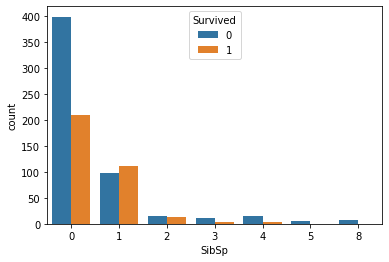

In [348]:
## ploting
sns.countplot(x=train["SibSp"],hue=train["Survived"],data=train)

In [349]:
## Summary
# travelling Alone(608) & Survuved(210) : .35
# travelling Not-Alone(283) & Survuved(132) : .47

# Travelling alone less survival chances

### Parch

In [350]:
train["Parch"].head()

train["Parch"].isna().sum()     # No null value
test["Parch"].isna().sum()     # No null value

train[["Parch"]].info()         # int dtype

train["Parch"].describe()

train["Parch"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["Parch"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


<AxesSubplot:xlabel='Parch', ylabel='count'>

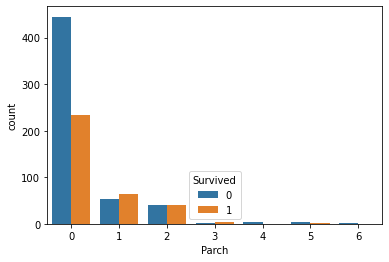

In [351]:
## ploting
sns.countplot(x=train["Parch"],hue=train["Survived"],data=train)

In [352]:
## Summary
# travelling Alone(678) & Survuved : .34
# travelling Not-Alone(213) & Survuved : .51

# Travelling alone less survival chances

### Family Size:

In [361]:
train["Family"]=train["SibSp"]+train["Parch"]
test["Family"]=test["SibSp"]+test["Parch"]

sns.countplot(x="Family",data=train)

### Ticket :

In [353]:
train.drop(["Ticket"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)

### Fare :

In [354]:
train["Fare"].head()

train["Fare"].isna().sum()    # No null values
test["Fare"].isna().sum()    # 1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
test["Fare"]=imputer.fit_transform(test[["Fare"]])

train[["Fare"]].info()        # int dtype

test["Fare"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

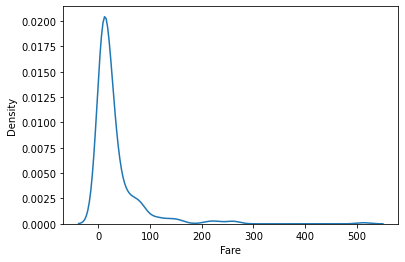

In [355]:
## Plot
sns.kdeplot(x="Fare",data=train)    # Along X-axis

### Cabin 

In [356]:
train["Cabin"].head()

train["Cabin"].isna().sum()    # 687
test["Cabin"].isna().sum()    # 327

train.drop(["Cabin"],axis=1,inplace=True)
test.drop(["Cabin"],axis=1,inplace=True)

### Embarked

In [357]:
train["Embarked"].head()

train["Embarked"].isna().sum()     # 2
test["Embarked"].isna().sum()     # No null value

## Filling missing values
train["Embarked"].fillna(value="C",inplace=True)

train[["Embarked"]].info()         # Ordinal Category

train["Embarked"].describe()


train["Embarked"].value_counts()  # ["C" , "Q" , "S"]
pd.crosstab(train["Survived"],train["Embarked"])

# Embarked Encoder
def embarked_encoder(data):
    df=pd.get_dummies(data=data["Embarked"],prefix='Embarked')
    data=pd.concat([data,df],axis=1) 
    data.drop(["Embarked"],axis=1,inplace=True)
    return data
    
train=embarked_encoder(train)
test=embarked_encoder(test)

#train.Embarked_Q.value_counts()   # 0:814 ; 1:77
#train.Embarked_S.value_counts()   # 0:247 ; 1:644 
#train.Embarked_C.value_counts()   # 0:721 ; 1:170

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [228]:
## ploting
sns.countplot(x=train["Embarked"],hue=train["Survived"],data=train)

KeyError: 'Embarked'

In [232]:
## Summary
# Survival rate for Embarked=="C" => .55
# Survival rate for Embarked=="S" => .34
# Survival rate for Embarked=="Q" => .39

# Pepole Embarked from "Queensland" having greater survival rate

### Survived

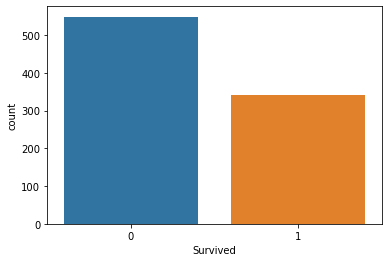

In [358]:
train["Survived"].head()

train["Survived"].isna().sum()    # no null-values

train["Survived"].value_counts()  # 0:549; 1:342

## plot
sns.countplot(x=train["Survived"],data=train)

# cutting out "Survived" and making as target(y)
target=train.pop("Survived")

## Model Training

### Logistic Reg.

In [277]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=21,multi_class="auto",C=2,dual=False,max_iter=50,penalty='l2',solver='lbfgs').fit(train,target)
lr_pred=lr.predict(test)
lr_proba=lr.predict_proba(test)          # Probability estimates.


"""
train_Accuracy : 0.8
test_Accuracy : 0.98
train_ROC AUC : 0.85
test_ROC AUC : 1.0
"""

C:\Users\JokeRR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\ntrain_Accuracy : 0.8\ntest_Accuracy : 0.98\ntrain_ROC AUC : 0.85\ntest_ROC AUC : 1.0\n'

### SVC

In [278]:
from sklearn.svm import SVC
svc=SVC(probability=True).fit(train,target)              ##train model
svc_pred=svc.predict(test)  # prediction
svc_proba=svc.predict_proba(test) # predict probability class(if probability=True)


"""
train_Accuracy : 0.68
test_Accuracy : 1.0
train_ROC AUC : 0.74
test_ROC AUC : 1.0
"""

'\ntrain_Accuracy : 0.68\ntest_Accuracy : 1.0\ntrain_ROC AUC : 0.74\ntest_ROC AUC : 1.0\n'

### Random Forest

In [279]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True,class_weight='balanced_subsample',criterion='gini',max_features='log2',n_estimators=100).fit(train,target)         ## Train model
rf_pred=rf.predict(test)                       ##  prediction
rf_proba=rf.predict_proba(test)           # Predict class probabilities

## After Tuning: Score increased 79.44 to 82.
#{'bootstrap'=True,'class_weight'='balanced_subsample','criterion'='gini','max_features'='log2','n_estimators'=100}
"""
train_Accuracy : 0.81
test_Accuracy : 0.99
train_ROC AUC : 0.87
test_ROC AUC : 1.0
"""

'\ntrain_Accuracy : 0.81\ntest_Accuracy : 0.99\ntrain_ROC AUC : 0.87\ntest_ROC AUC : 1.0\n'

In [360]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,23,1,0,7.2500,0,0,1
1,2,1,1,39,1,0,71.2833,1,0,0
2,3,3,1,27,0,0,7.9250,0,0,1
3,4,1,1,36,1,0,53.1000,0,0,1
4,5,3,0,36,0,0,8.0500,0,0,1


## Model Selection :  

In [379]:
### SelectKBest
from sklearn.feature_selection import SelectKBest,f_classif
skb=SelectKBest(f_classif
                ,k=9)
skb.fit_transform(train,target)

skb.scores_   # (n_features) Scores of features
skb.pvalues_  # (n_features) p-values of feature scores (None: if 'score_func' returned only scores)


### GenericUnivariateSelect
from sklearn.feature_selection import GenericUnivariateSelect,chi2
gus=GenericUnivariateSelect(chi2,mode='k_best',param=5)
gus.fit_transform(train,target)

gus.scores_   # (n_features) Scores of features
gus.pvalues_  # (n_features) p-values of feature scores (None: if 'score_func' returned only scores)


### RFE 
import warnings
warnings.filterwarnings(action="ignore",module="scipy",message="^internal gelsd")  ## Suppress warning
from sklearn.feature_selection import RFECV

# set model
rfecv=RFECV(rf,cv=20,n_jobs=-1,min_features_to_select=11,scoring="roc_auc")
rfecv.fit(train,target)

rfecv.n_features_       # No. of Best Features
rfecv.support_          # Best Features(as True)
rfecv.ranking_          # Features Rank(best:1 to worst)
rfecv.grid_scores_      # CV Score for each Feature
rfecv.estimator_          # Info. of External Model

### Sequential Selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(bootstrap=True,class_weight='balanced_subsample',criterion='gini',max_features='log2',n_estimators=100)
sfs=SequentialFeatureSelector(model,n_features_to_select=7,direction='forward',n_jobs=-1)
sfs.fit(train,target)

#sfs.transform(X)  # Reduce 'x' to selected features     

sfs.n_features_to_select_ #(int) No. of features that selected


array([2.22848123e-02, 1.15031272e+02, 3.72405724e+02, 3.72286371e+00,
       1.11057220e+00, 5.96346384e+00, 6.30307642e+01, 2.79923057e+01,
       1.18463440e-02, 2.20754686e+01, 2.46193112e-01])

## Hyperparameter Tuning:

In [127]:
from sklearn.model_selection import GridSearchCV

## {'parameter_name'=[possible values]}
param_grid={"criterion":["gini","entropy"],
            "max_features":["auto","sqrt","log2"],
            "class_weight":["balanced",'balanced_subsample'],
            "n_estimators":[50,100,150,200,250,300,400,500],
            "bootstrap":[True,False]
           }

# np.logspace(0,4,10)  # generate float
# np.arange(0,15)      # generate int


gscv=GridSearchCV(model,param_grid,cv=10,verbose=0,refit=False)  
best=gscv.fit(train,target)

In [129]:
#best.best_estimator_               ## best model(if refit=True)
best.best_score_                   ## mean cv score((if refit=True))
best.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 100}

## Calibration Curve

ValueError: y should be a 1d array, got an array of shape (418, 9) instead.

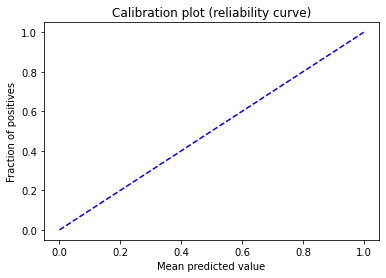

In [285]:
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss

# Calibration Plot: Lower 'brier-score'|line more similar to Perfectly-calibrated line is "better calibrated model" 
fig=plt.figure()
ax=fig.add_subplot()
ax.plot([0,1],[0,1],"b--",label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

## Logistic Regression
lr_score=brier_score_loss(true,lr_proba,pos_label=target.max())
fraction_of_positives,mean_predicted_value=calibration_curve(true,lr_pos,n_bins=10)

ax.plot(mean_predicted_value,fraction_of_positives,"s-",label="%s (%0.3f)" % ('LR',lr_score))
print("Brier score Logistic Regression: %0.2f" % brier_score_loss(test,lr_pred))


## SVC
svc_score=brier_score_loss(test,svc_proba,pos_label=target.max())
fraction_of_positives,mean_predicted_value=calibration_curve(test,svc_proba,n_bins=10)

ax.plot(mean_predicted_value,fraction_of_positives,"s-",label="%s (%0.3f)" % ('SVC',svc_score))
print("Brier score LR: %0.2f" % brier_score_loss(test,svc_pred))



## Random Forrest
rf_score=brier_score_loss(test,rf_proba,pos_label=target.max())
fraction_of_positives,mean_predicted_value=calibration_curve(test,rf_proba,n_bins=10)

ax.plot(mean_predicted_value,fraction_of_positives,"s-",label="%s (%0.3f)" % ('Random Forest',rf_score))
print("Brier score LR: %0.2f" % brier_score_loss(test,rf_pred))

ax.legend(loc="upper left")
plt.show()

In [286]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Model Calibration :

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrator=CalibratedClassifierCV(model,cv=3)
calibrator.fit(X_train,y_train)
calibrator.predict_proba(X_test)


## Model Evaluation : 

In [275]:
from sklearn.model_selection import cross_val_score
accuracy_score=cross_val_score(model3,train,target,cv=20,scoring="accuracy") 
print("train_Accuracy :",round(accuracy_score.mean(),2))       
accuracy_score=cross_val_score(model3,test,ypred,cv=20,scoring="accuracy") 
print("test_Accuracy :",round(accuracy_score.mean(),2))       


rocauc_score=cross_val_score(model3,train,target,cv=20,scoring="roc_auc") 
print("train_ROC AUC :",round(rocauc_score.mean(),2))       
rocauc_score=cross_val_score(model3,test,ypred,cv=20,scoring="roc_auc") 
print("test_ROC AUC :",round(rocauc_score.mean(),2))    



train_Accuracy : 0.81
test_Accuracy : 0.99
train_ROC AUC : 0.87
test_ROC AUC : 1.0


## Transform prediction for kaggle submision:


In [38]:
submission=pd.DataFrame({"Survived":y_pred})
submission.to_csv('submission_v0.csv',index=False)
#"PassengerId":test["PassengerId"],

In [ ]:
submission=pd.read_csv('submission_v0.csv')
submission

In [ ]:
## Saving Model

In [133]:
import pickle
pickle_out=open("titanic_v0.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()